In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('daegu_apart_preprocessed.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),AgeOfBuilding,N_FacilitiesInApt,Size(sqf),SalePrice,TotalFacilityNearby,FacilityScore,HasParking
0,terraced,5.0,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,18,10,1387,346017,5.0,8.5,1
1,terraced,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,39,4,914,150442,7.0,10.0,0
2,mixed,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,28,5,558,61946,11.0,17.0,1
3,mixed,7.5,Bangoge,5.0,5.0,4.0,798.0,20,7,914,165486,14.0,18.0,1
4,terraced,5.0,Sin-nam,0.0,1.0,2.0,536.0,19,5,1743,311504,3.0,5.5,1


In [6]:
from feature_engine.encoding import MeanEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_cols = ['HallwayType', 'SubwayStation']

encoder = MeanEncoder(variables=cat_cols)

encoder.fit(X_train, y_train)

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Scale your numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

y_train_pred_nn = model.predict(X_train_scaled)
y_test_pred_nn = model.predict(X_test_scaled)

Epoch 1/100


/Users/kikomatchii/Documents/JCAIEJKTAM01/CAPSTONE/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 61066915840.0000 - mae: 223527.5781 - val_loss: 61932974080.0000 - val_mae: 222545.5000
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59863855104.0000 - mae: 219901.4844 - val_loss: 60259094528.0000 - val_mae: 219219.6406
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56700710912.0000 - mae: 213279.8125 - val_loss: 51042189312.0000 - val_mae: 200206.4531
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46119337984.0000 - mae: 191355.6875 - val_loss: 29925027840.0000 - val_mae: 148801.7500
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23267344384.0000 - mae: 129403.3203 - val_loss: 11362587648.0000 - val_mae: 84580.2734
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9751479296.0000 - mae: 77602.4531 - val_loss: 7610363392.0000 - val_mae: 71600.8594
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7105547264.0000 - mae: 67817.1562 - val_loss: 6699033600.0000 - val_mae: 678

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("Neural Network Performance:")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_nn))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_nn))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_nn)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_nn)))
print("Train R2:", r2_score(y_train, y_train_pred_nn))
print("Test R2:", r2_score(y_test, y_test_pred_nn))
print("Train MAPE:", mean_absolute_percentage_error(y_train, y_train_pred_nn))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_test_pred_nn))


Neural Network Performance:
Train MAE: 38396.96335255268
Test MAE: 36513.76233901515
Train RMSE: 47593.57899493028
Test RMSE: 45653.002307100265
Train R2: 0.8037263751029968
Test R2: 0.8067375421524048
Train MAPE: 0.2155425532755662
Test MAPE: 0.21635641452414348


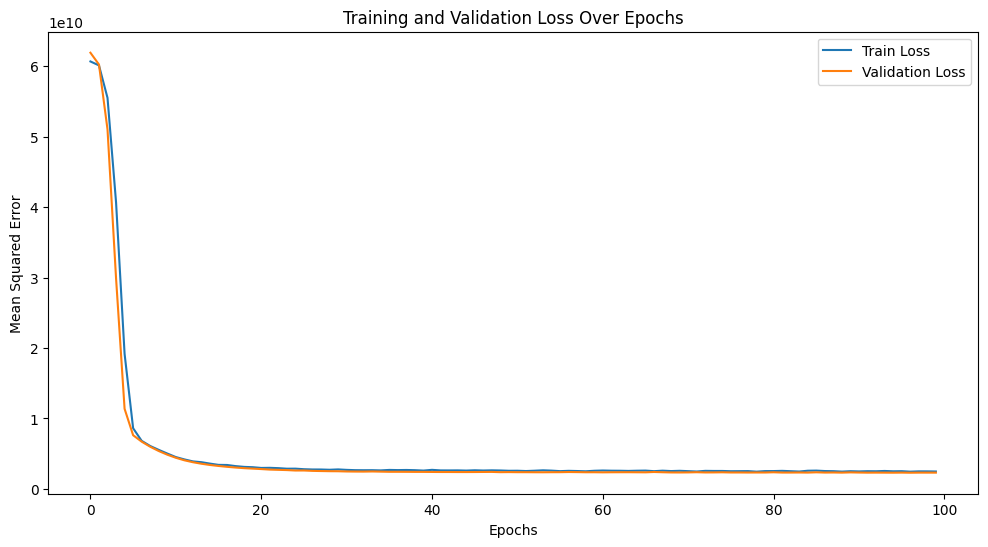

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()